#### **Introduction to GANs**

GAN - Generative Adversarial Network

- It is used to generate images.
- It uses a generator to generate images and a discriminator to classify if the generated image is real or fake.

#### **GAN Arcitecture**

It consists of two networks -
- Generator
- Discriminator

The **generator** receives random noise as input and produces an image as output. \
The noise is a tensor of random values drawn from a standard normal distribution.
Its goal is to generate realistic images.

The **discriminator** receives real images and fake images as input. \
Its goal is to identify if the input image is *real* or *fake*.

Both the networks are trained togeather but they have conflicting objectives. \
One has to generate images while other has to identify if it is generated or real.

Generator's goal is to produce realistic images that are good enough to fool the discriminator. \
This is known as an adversarial training.

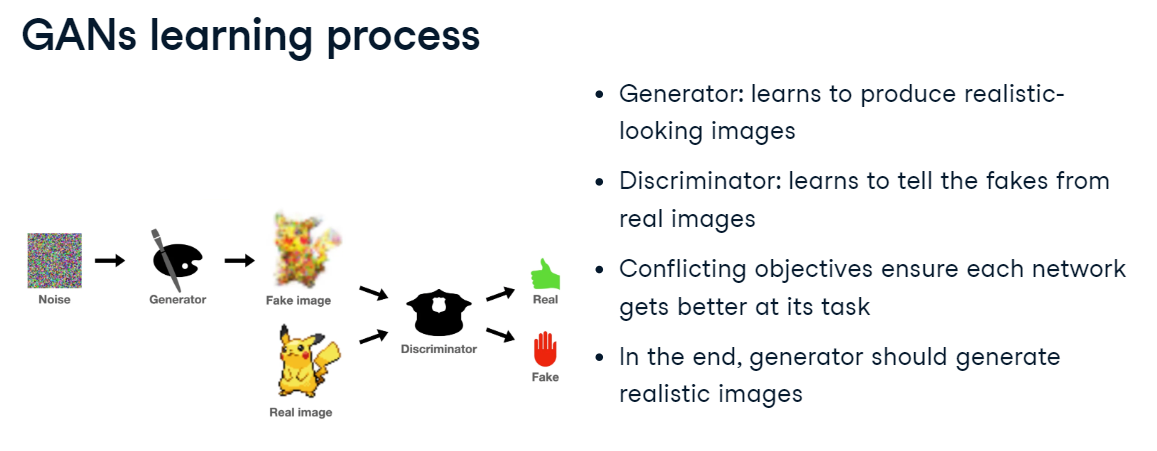
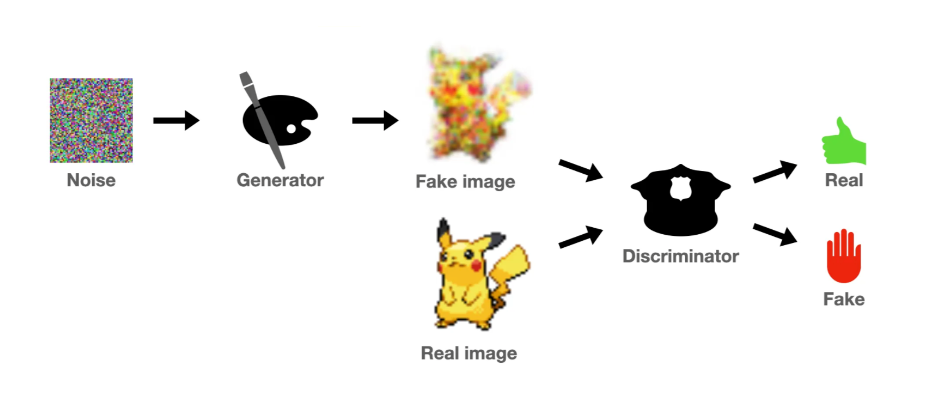

#### **Building a GAN**

Let us use `PokeAPI` dataset which is a dataset of Pokemon Sprites. \
It has 1300+ Pokemon images. \
Our goal is to generate new pokemons!

Basic Generator -

In [ ]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(Generator, self).__init__()
        self.generator = nn.Sequential(
            gen_block(indim, 256),
            gen_block(256, 512),
            gen_block(512, 1024),
            nn.Linear(1024, out_dim),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        return self.generator(x)
    
    def gen_block(in_dim, out_dim):
        reutrn nn.Sequential(
            nn.Linear(in_dim, out_dim),
            nn.BatchNorm1d(out_dim),
            nn.ReLU(inplace=True)
        )

Basic Discriminator -

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, im_dim):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            disc_block(im_dim, 1024),
            disc_block(1024, 512),
            disc_block(512, 256),
            nn.Linear(256, 1),
        )
    
    def forward(self, x):
        return self.disc(x)

    def disc_block(in_dim, out_dim):
        return nn.Sequential(
            nn.Linear(in_dim, out_dim),
            nn.LeakyReLU(0.2)
        )